In [21]:
import pandas as pd

# 假設我們有以下的數據集，其中x1和x2是特徵，r是類別標籤
data = {
    'x1': [0, 1, 2, 2, 3],
    'x2': [0, 1, 3, 0, 4],
    'r': ['A', 'A', 'B', 'A', 'B']
}

df = pd.DataFrame(data)
df

,x1,x2,r
0,0,0,A
1,1,1,A
2,2,3,B
3,2,0,A
4,3,4,B


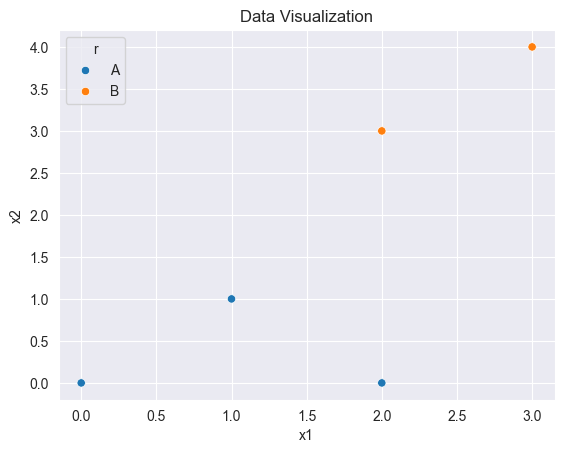

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# 可視化數據點
sns.scatterplot(data=df, x='x1', y='x2', hue='r')
plt.title('Data Visualization')
plt.show()

In [23]:
from sklearn.svm import SVC

# 將數據分為特徵和標籤
X = df[['x1', 'x2']]
y = df['r']

# 創建SVM分類器
clf = SVC(kernel='linear')

# 訓練模型
clf.fit(X, y)

SVC(kernel='linear')

/Users/af/code/SEHS4696-ML/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


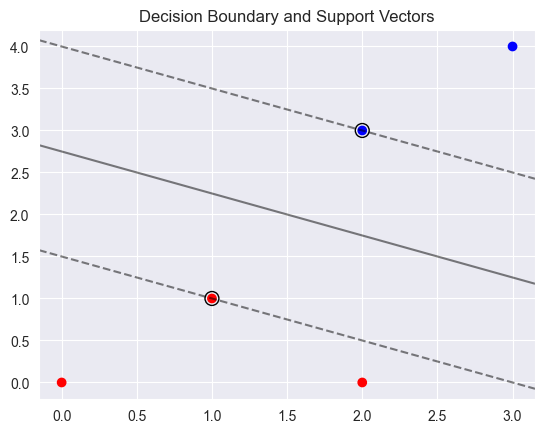

In [24]:
import numpy as np

# 繪製決策邊界
plt.scatter(df['x1'], df['x2'], c=df['r'].apply(lambda x: 'r' if x == 'A' else 'b'))
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 創建網格以決定圖的邊界
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
xy = np.vstack([xx.ravel(), yy.ravel()]).T
Z = clf.decision_function(xy).reshape(xx.shape)

# 繪製決策邊界和邊界
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# 繪製支持向量
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.title('Decision Boundary and Support Vectors')
plt.show()